In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
loandata=pd.read_csv('loan_data.csv')
loandata.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000.0,N
1,Male,Yes,3000,66000.0,Y
2,Male,Yes,2583,120000.0,Y
3,Male,No,6000,141000.0,Y
4,Male,Yes,5417,267000.0,Y


In [4]:
loandata.shape

(577, 5)

In [5]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           577 non-null    object 
 1   Married          577 non-null    object 
 2   ApplicantIncome  577 non-null    int64  
 3   LoanAmount       577 non-null    float64
 4   Loan_Status      577 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.7+ KB


In [6]:
loandata.describe()

,ApplicantIncome,LoanAmount
count,577.000000,577.000000
mean,5297.119584,144968.804159
std,5853.236196,82704.181660
min,150.000000,9000.000000
25%,2889.000000,100000.000000
50%,3800.000000,127000.000000
75%,5746.000000,167000.000000
max,81000.000000,650000.000000


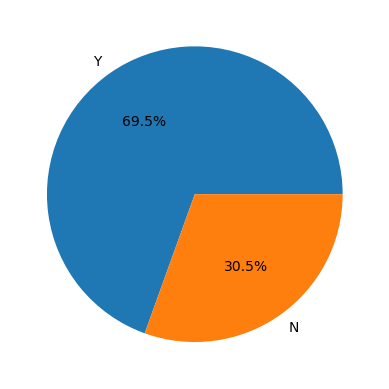

In [7]:
#piechart for loan_status_count
temp = loandata['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()
#Here we have an imbalanced dataset. We will have to balance it before training any model on this data.

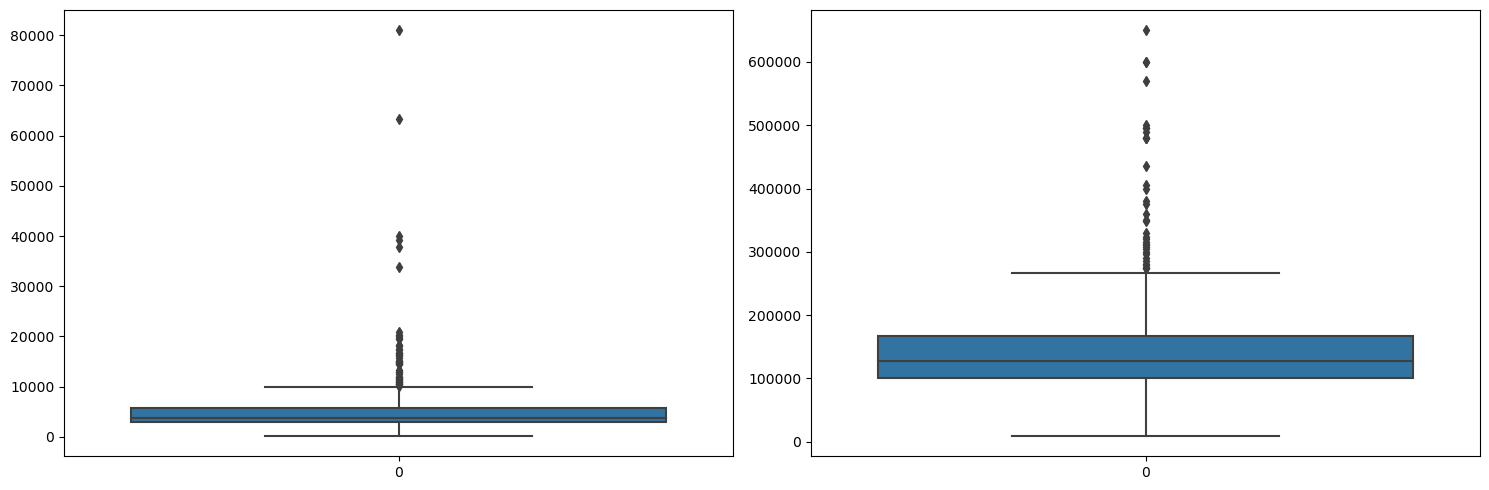

In [12]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.boxplot(loandata[col])
plt.tight_layout()
plt.show()
#There are some extreme outlier’s in the data we need to remove them.

In [15]:
#removing the outliers manually
loandata = loandata[loandata['ApplicantIncome'] < 25000]
loandata = loandata[loandata['LoanAmount'] < 400000]

In [16]:
loandata.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000.0,N
1,Male,Yes,3000,66000.0,Y
2,Male,Yes,2583,120000.0,Y
3,Male,No,6000,141000.0,Y
4,Male,Yes,5417,267000.0,Y


In [17]:
#Let’s see the mean amount of the loan granted to males as well as females.
loandata.groupby('Gender').mean()['LoanAmount']

Gender
Female    118822.429907
Male      139289.823009
Name: LoanAmount, dtype: float64

In [19]:
loandata.groupby(['Married', 'Gender']).mean()['LoanAmount']

Married  Gender
No       Female    116115.384615
         Male      126644.628099
Yes      Female    126103.448276
         Male      143912.386707
Name: LoanAmount, dtype: float64

In [20]:
#The loan amount requested by males is higher than what is requested by females.

In [21]:
loandata.groupby(['Married', 'Gender']).mean()['LoanAmount']

Married  Gender
No       Female    116115.384615
         Male      126644.628099
Yes      Female    126103.448276
         Male      143912.386707
Name: LoanAmount, dtype: float64

In [ ]:
#The married people requested loan amount is generally higher than that of the unmarried. 
#This may be one of the reason’s that we observe earlier that the chances of getting loan approval for a married person are lower than that compared to an unmarried person.

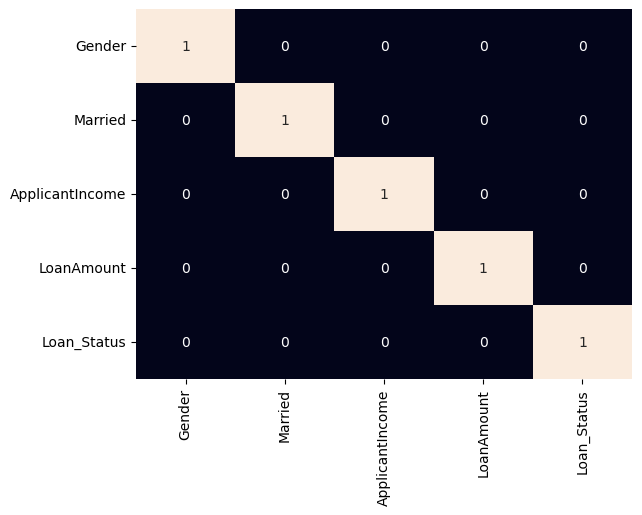

In [23]:
# Function to apply label encoding
from sklearn.preprocessing import LabelEncoder
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
  
    return data
  
# Applying function in whole column
loandata = encode_labels(loandata)
  
# Generating Heatmap
sb.heatmap(loandata.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [24]:
loandata.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,1,1,4583,128000.0,0
1,1,1,3000,66000.0,1
2,1,1,2583,120000.0,1
3,1,0,6000,141000.0,1
4,1,1,5417,267000.0,1


In [27]:
loandata.shape

(559, 5)

# Data Preprocessing

In [35]:
#Indentify the independent and target(dependent) variables

IndepVar=[]
for col in loandata.columns:
    if col !='Loan_Status':
        IndepVar.append(col)
        
TargetVar='Loan_Status'

x=loandata[IndepVar]
y=loandata[TargetVar]
print(x)
print(y)

     Gender  Married  ApplicantIncome  LoanAmount
0         1        1             4583    128000.0
1         1        1             3000     66000.0
2         1        1             2583    120000.0
3         1        0             6000    141000.0
4         1        1             5417    267000.0
..      ...      ...              ...         ...
572       0        0             2900     71000.0
573       1        1             4106     40000.0
574       1        1             8072    253000.0
575       1        1             7583    187000.0
576       0        0             4583    133000.0

[559 rows x 4 columns]
0      0
1      1
2      1
3      1
4      1
      ..
572    1
573    1
574    1
575    1
576    0
Name: Loan_Status, Length: 559, dtype: int32


In [36]:
#split the data into tain and test(random sampling)

from sklearn.model_selection import train_test_split

#70% for training and 30% for testing x=independent varaibles(6) y=dependent variable(1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#display the shape for train&test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((391, 4), (168, 4), (391,), (168,))

In [38]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test= mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [51]:
from sklearn.svm import SVC

#create an object for model

Modelsv=SVC(probability=True)

#train the model

Modelsv.fit(x_train,y_train)

#predict the model with test data set

y_pred=Modelsv.predict(x_test)
y_pred_prob=Modelsv.predict_proba(x_test)

In [42]:
# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

Confusion matrix : 
 [[115   0]
 [ 53   0]]


In [43]:
# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

Outcome values : 
 115 0 53 0
Classification report : 
               precision    recall  f1-score   support

           1       0.68      1.00      0.81       115
           0       0.00      0.00      0.00        53

    accuracy                           0.68       168
   macro avg       0.34      0.50      0.41       168
weighted avg       0.47      0.68      0.56       168



Accuracy : 68.5 %
Precision : 68.5 %
Recall : 100.0 %
F1 Score : 0.813
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


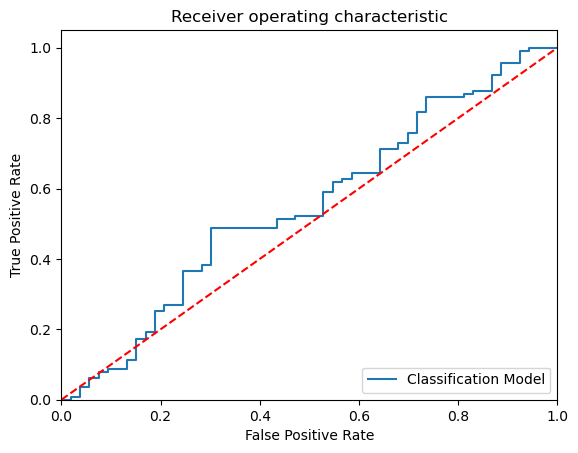

-----------------------------------------------------------------------------------------------------


In [52]:
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)







# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,Modelsv.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [54]:
#display the final results
Results=pd.DataFrame({'Loan_Status_A':y_test,'Loan_Status_P':y_pred})

#MERGE TWO DATAFRAMES ON INDEX OF BOTH THE DATAFRAMES

ResultsFinal=loandata.merge(Results,left_index=True,right_index=True)

#DISPLAY 5 RECORDS RANDOMLY

ResultsFinal.sample(10)

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status,Loan_Status_A,Loan_Status_P
182,1,0,8333,187000.0,1,1,1
328,1,1,9083,228000.0,1,1,1
240,1,0,6045,115000.0,0,0,1
271,0,0,4124,115000.0,1,1,1
410,1,1,2425,143000.0,1,1,1
68,1,0,3500,81000.0,1,1,1
297,1,1,3717,120000.0,1,1,1
79,1,1,3988,50000.0,1,1,1
168,1,0,1916,67000.0,0,0,1
420,1,1,3466,130000.0,1,1,1
